In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
x, Y = iris.data, iris.target

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
np.shape(x)

(150, 4)

In [10]:
# no. of each species
iris_dict = {}
for i in range(3):
    iris_dict[iris.target_names[i]] = sum(Y == i)

print(iris_dict)

{'setosa': 50, 'versicolor': 50, 'virginica': 50}


$$
Gini index = 1- \sum{p_{i}^2}
$$

In [16]:
# compute the Gini index of the root node
1 - (49/147)*(49/147)*3

0.6666666666666667

In [22]:
# select the training set
x_train = np.delete(x, [25,75,125], axis=0)
x_test = x[[25, 75, 125],]
Y_train = np.delete(Y, [25, 75, 125], axis=0)
Y_test = Y[[25, 75, 125],]

In [39]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
decision_tree = decision_tree.fit(x_train, Y_train)
r = export_text(decision_tree, feature_names=iris.feature_names)

In [40]:
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



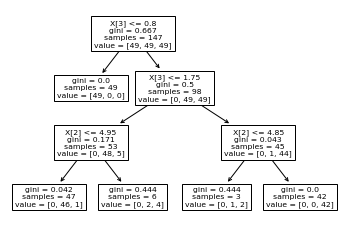

In [43]:
plot_tree(decision_tree, filled=False)
plt.show()

In [18]:
# compute the Gini index of the X[3] node
1- (49/98)*(49/98)*2

0.5